# Descrição do data set


 - Dataset em "./adult.csv"
 -  Descrição extraída do case técnico do Turing.Usp

>1. **age** - Idade
>2. **workclass** - Classe de trabalho, ou seja, o tipo de vínculo empregatício (ex.
>Private (privado), State-gov (governo estadual))
>3. **fnlwgt** - “final weight”, representa o número de unidades na população alvo
>que correspondem àquela unidade representativa (em outras palavras, é um
>peso atribuído para cada linha, cujo significado literal é que, para obter os
>dados completos, deve-se replicar cada linha pelo número dessa feature. E,
>sim, seriam bilhões de linhas, mas não se assuste com o tamanho, pois são
>dados acumulados ao longo de décadas.)
>4. **education** - Nível de escolaridade representado por categorias
>5. **educational-num** - Nível de escolaridade representado numericamente em
>ordem crescente de anos dedicados à educação (números inteiros de 1 a 16)
>6. **marital-status** - Estado civil
>7. **occupation** - Ocupação, ou seja, o tipo de trabalho exercido por aquela pessoa
>(ex. Sales (vendas), Farming-fishing (fazenda e/ou pesca))
>8. **relationship** - Papel que esse indivíduo ocupa dentro do seu ciclo familiar (ex.
>Husband (marido), Not-in-family (não está em uma família), Wife (esposa))
>9. **race** - Etnia
>10. **gender** - Gênero
>11. **capital-gain** - Ganhos por fontes de investimento externas ao salário
>12. **capital-loss** - Perdas por fontes investimento externas ao salário
>13. **hours-per-week** - Horas de trabalho semanais
>14. **native-country** - País de origem
>15. **income** - Renda anual, pode ser <=50K (menor ou igual a 50 mil dólares ao
>ano) ou >50K (maior que 50 mil dólares ao ano)


## Setup Inicial

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataFrame = pd.read_csv("adult.csv")


## Observações iniciais

In [88]:

dataFrame.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


Apartir da leitura das primeiras linhas do conjunto de dados, é possível notar como o dataset está estruturado em diferentes features, sendo `income` o alvo da análise. <br>
Percebe-se que `capital-gain` e `capital-loss` são mutualmente exclusivos, se há a presença de um, não há a do outro, e por isso agregar-se-á estes numa única feature chamada `net-worth`. <br>
Nota-se também que `education` e `educational-num` são diferentes representações de uma única feature, a primeira sendo qualitativa e a segunda quantitativa, e portanto será só analisado a coluna `educational-num`.

In [82]:
dataFrame = dataFrame.drop(columns="education")
dataFrame.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


*Remove-se a coluna education  e inverte-se os valores de `capital-loss`*

In [84]:
dataFrame["net-worth"] = dataFrame["capital-gain"] - dataFrame["capital-loss"]
dataFrame.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,net-worth
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,7688
4,18,Private,103497,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K,0


*Então cria-se uma nova coluna que é a subtração entre `capital-gain` e `capital-loss`, chamada `net-worth`*

In [85]:
dataFrame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47985 entries, 0 to 47984
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              47985 non-null  int64 
 1   workclass        47985 non-null  object
 2   fnlwgt           47985 non-null  int64 
 3   educational-num  47985 non-null  int64 
 4   marital-status   47985 non-null  object
 5   occupation       47985 non-null  object
 6   relationship     47985 non-null  object
 7   race             47985 non-null  object
 8   gender           47985 non-null  object
 9   capital-gain     47985 non-null  int64 
 10  capital-loss     47985 non-null  int64 
 11  hours-per-week   47985 non-null  int64 
 12  native-country   47985 non-null  object
 13  income           47985 non-null  object
 14  net-worth        47985 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.5+ MB


Usando `info()` nota-se que o data-se contém **features** mistas, com predominancia daqueles qualitativos, como: `native-country`, `gender`, `race`, `relationship`, `occupation`, `marital-status` e `workclass`, sem contar `income` que é o **target** deste estudo; todas estas **features** serão aqui abordadas como sendo nominais. <br> <br>
Já para as **features** quantitativas tem-se: `hours-per-week`, `capital-loss`, `capital-gain`, `educational-num`, `fnlwgt` e `age`, sendo apenas `hours-per-week`, `age` e `educational-num` discretos.

In [119]:
dataFrame.describe(percentiles=[.25,.50,.75,.90])

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,net-worth
count,47985.000000,4.798500e+04,47985.000000,47985.000000,47985.000000,47985.000000,47985.000000
mean,38.641284,1.895940e+05,10.067229,1067.032093,87.370553,40.411483,979.661540
std,13.729622,1.057605e+05,2.560534,7373.256663,402.681462,12.391073,7396.859092
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,-4356.000000
25%,28.000000,1.173490e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.377200e+05,12.000000,0.000000,0.000000,45.000000,0.000000
90%,58.000000,3.285810e+05,13.000000,0.000000,0.000000,55.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,99999.000000


Aqui vê-se uma descrição das **features** numéricas <br><br>
Além de uma visão geral de como é o demográfico utilizado no dataset (como por exemplo a média etária da população é de 38 anos), percebe-se alguns comportamentos notáveis <br><br>
`net-worth` possue um desvio extremamente alto se comparado à média, além de mostrar que a maior parte da população estudada, pelo menos 90%, não investe. <br>
`age` e `hours-per-week` também demostram uma alta variação, porém não tão elevada como aquelas, podendo chegar a valores de 90 anos e uma joranada de trabalho de 99 horas semanais.

# Features Quantitativas


**Para estudar as features quantitativas, serão utilizados histogramas e grráficos de caixa de forma a comparar tanto valores apenas numéricos como para analisar suas relações com aqueles qualitativos**

## Age


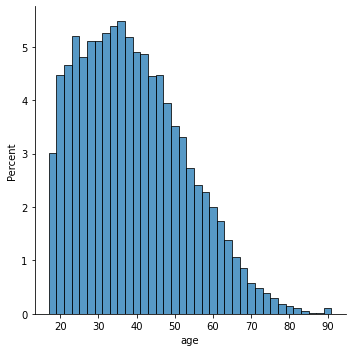

In [56]:
sns.displot(x="age", data=dataFrame, stat="percent", binwidth=2)
plt.show()



Apartir do gráfico nota-se a distribuição das idades, valores abaixo de 16 não estão presentes nos dataset. <br>
É possível notar também que a população concentra-se entre 20 e 45 anos, com valores como o de 22-23 anos e 89-90 anos sendo **outliers**, ou seja, muito diferentes do que seria esperado com base no comportamento da distribuição. <br>
Também percebe-se uma diminuição gradual da concentração de valores a partir de 45 anos, com 70 anos tendo uma participação inferior à 0.5%.

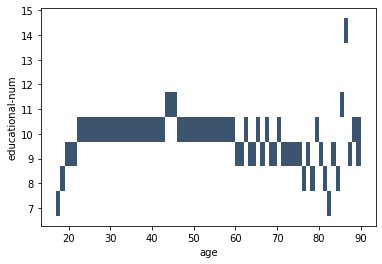

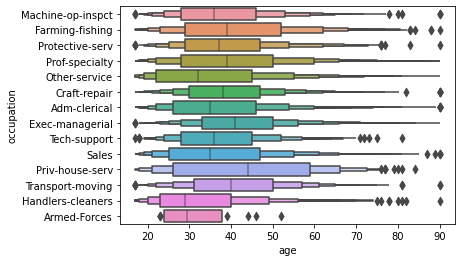

In [103]:
pivot = dataFrame.pivot_table(values=["educational-num","occupation"], index="age")
ax = sns.histplot(x="age",y="educational-num",data=pivot, element="step",binwidth=1)
plt.show()
sns.boxenplot(x="age",y="occupation",data=dataFrame)
plt.show()


O primeiro gráfico correlaciona idade com escolaridade, e percebe-se que existe uma correlação positiva até os 25 anos que depois se estabiliza num grau 10 até os 60 anos. A partir dos 60 anos a correlação não se torna mais confiável mas ainda é percepitível alguns **outliers** como o de grau 14 aos 87 anos e o grau 7 aos 83 anos <br><br>
Já o segundo gráfico correlaciona idade com emprego, e é possível destacar alguns pontos, como o serviço militar tendo alguns **outliers** com idade avançada para servir ao exército;<br> Mordomos têm a maior distribuição entre idades, sendo comum o emprego até os 58~ anos <br>
Vale destacar também que a faixa etária de empregabilidade está entre 25-45 anos, onde nela há a maior proporção de pessoas empregadas


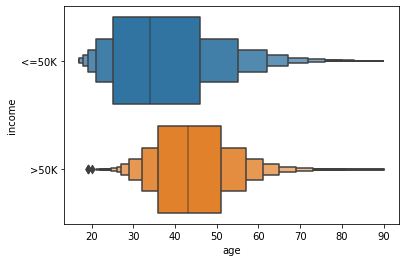

In [92]:
sns.boxenplot(y="income",x="age",data=dataFrame)
plt.show()

Finalmente, mostra-se a correlação entre ganhos anuais e idade, com a maior parte das pessoas com ganhos acima de 50 mil estando antre 35-50 anos, porém apenas algumas pessoas com idades próximas à 20 anos também ganham este mesmo valor. <br>
Já para ganhos inferiores a 50 mil, nota-se que a distribuição está concentrada entre 25-50 anos, porém possue um número reduzido de **outliers**.

## Education


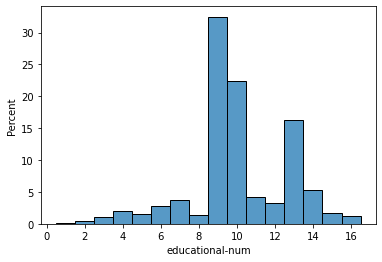

In [93]:
sns.histplot(x="educational-num", data=dataFrame, discrete=True, stat="percent")
plt.show()

Com a distribuição inicial da população, percebe-se que a distribuição está fortemente concentrada nos níveis educacionais 9º,10º e 13º, com uma parcela pequena entre o 10º e 13º, superiores ao nível 13º ou inferior ao 9º.

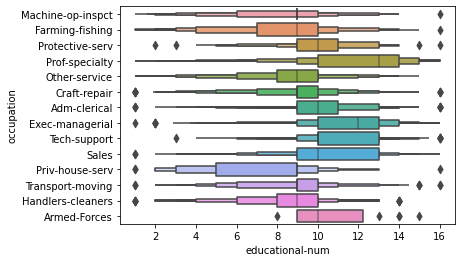

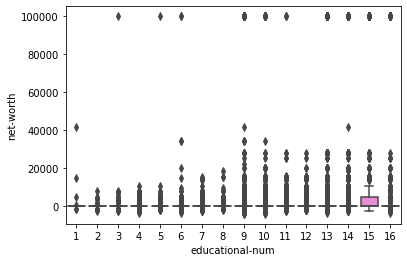

In [118]:

sns.boxenplot(x="educational-num",y="occupation",data=dataFrame)
plt.show()
sns.boxplot(x="educational-num",y="net-worth", data=dataFrame)
plt.show()

O primeiro gráfico correlaciona grau de escolaridade com emprego no qual observa-se uma concordância entre o grau escolar médio de um determinado emprego e sua correlação estatística, como por exemplo: profissionais especialistas têm em geral maior escolaridade do que fazendeiros e pescadores. <br> <br>
Já o segundo relaciona nível educacional e ganho final de investimentos, onde vê-se uma leve tendência aos ganhos subirem conforme o nível de escolaridade, mas ainda a maioria permenece sem investir com exceção do 15º grau escolar, no qual vê-se que uma quantidade substancial dos membros têm ganhos inferiores a 5 mil e maiores que 0. 

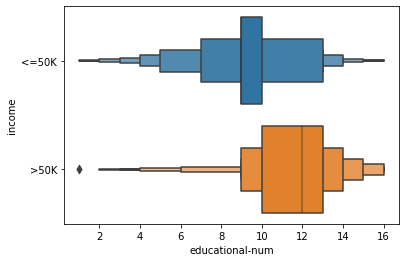

In [94]:
sns.boxenplot(x="educational-num", y="income", data=dataFrame)
plt.show()

Por fim, o gráfico mostra a relação entre escolaridade e ganhos anuais onde percebe-se claramente uma correlação positiva entre os dois.

## Net Worth


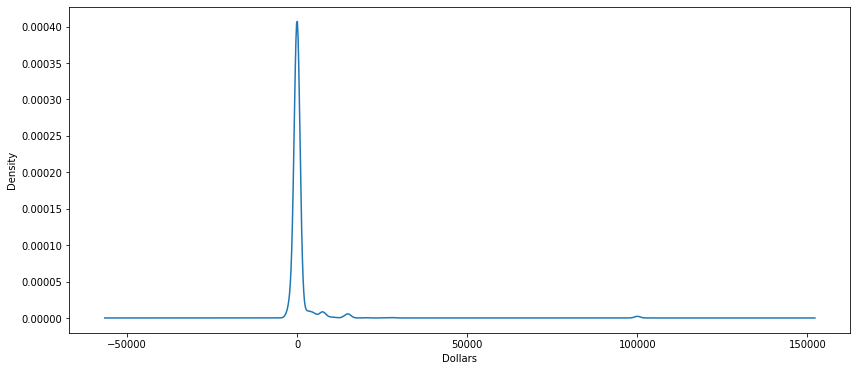

In [128]:
ax = dataFrame["net-worth"].plot(kind="density",figsize=(14,6))
ax.set_ylabel("Density")
ax.set_xlabel("Dollars")
plt.show()


Pela distribuição, percebe-se que a vasta maioria das pessoas não investem e por isso nem têm um ganho nem perda, também pode-se notar que os lucros superam os prejuízos em diversas ordens de magnitudes, sendo o valor mínimo dessa função de -4356 e o máximo de 100000.

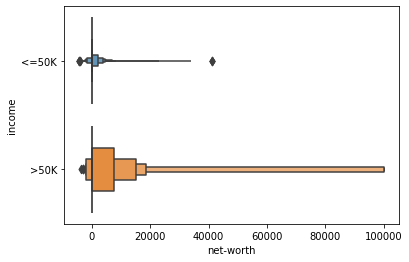

In [120]:
sns.boxenplot(y="income",x="net-worth",data=dataFrame)
plt.show()

Vê-se também uma clara correlação entre ganho por investimento e ganhos totais, com grande parcela das pessoas que investem ganhando anualmente valores acima de 50 mil dolares.

## Hours per Week


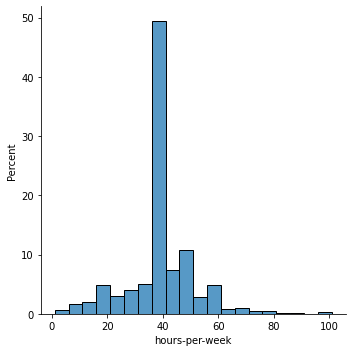

In [136]:
sns.displot(x="hours-per-week", data=dataFrame, stat="percent",binwidth=5)
plt.show()

Pela distribuição percebe-se que a maioria da população faz uma jornada de 40 horas semanais, com cerca de 15% trabalhando até 50 horas, e 10% trabalhando 60h ou mais.

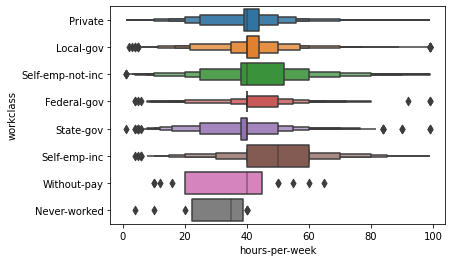

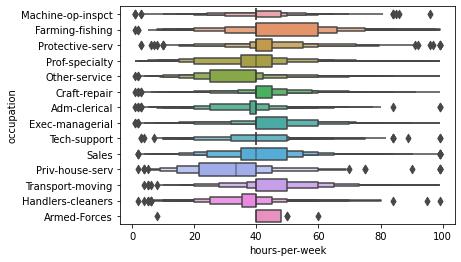

In [139]:
sns.boxenplot(x="hours-per-week",y="workclass",data=dataFrame)
plt.show()
sns.boxenplot(x="hours-per-week",y="occupation",data=dataFrame)
plt.show()


O primeiro gráfico correlaciona jornada de trabalho com tipo de trabalho, onde é notório que aqueles que nunca trabalharam ou trabalham sem remuneração têm jornadas de trabalhos em geral menores do que a média; já aqueles que são autônomos trabalham até 20h a mais do que a média. <br> <br>
O segundo gráfico mostra jornada de trabalho em relação ao emprego, em que se mostra presente que serventes e outros prestadores de serviço têm uma jornada de trabalho menor do que a média; já fazendeiros, motoristas, setor de finanças e executavos têm uma jornada de trabalho nitidamente maior. 

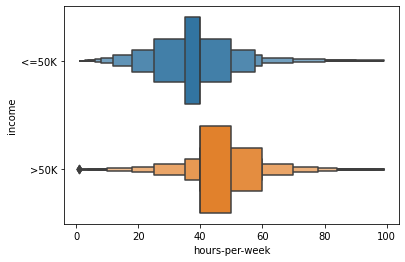

In [100]:
sns.boxenplot(y="income",x="hours-per-week",data=dataFrame)
plt.show()

Por fim o gráfico deixa clara a relação entre ganhos anuais e jornada de trabalho, com jornadas maiores resultando em ganhos mais elevados.

# Qualitative


## Workclass


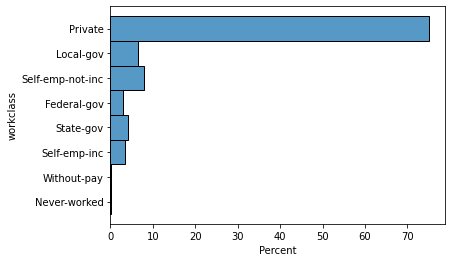

In [143]:
sns.histplot(y="workclass", data=dataFrame, stat="percent")
plt.show()

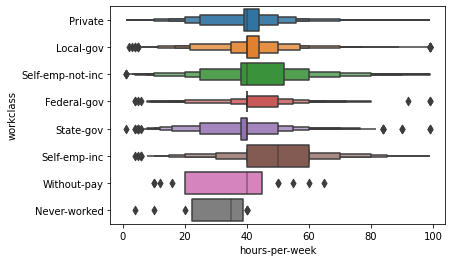

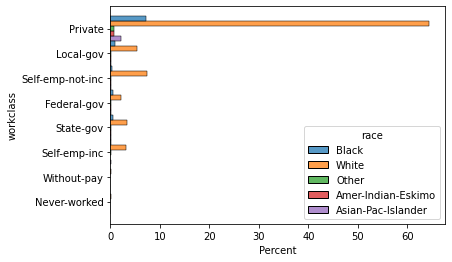

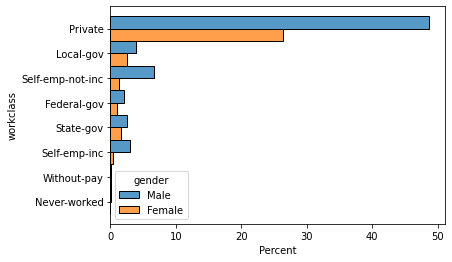

In [148]:
sns.boxenplot(x="hours-per-week",y="workclass",data=dataFrame)
plt.show()
sns.histplot(y="workclass", data=dataFrame, hue="race", multiple="dodge", stat="percent")
plt.show()
sns.histplot(y="workclass", data=dataFrame, hue="gender", multiple="dodge", stat="percent")
plt.show()


O primeiro gráfico já comentado na seção de *Work hours* <br><br>
Já o segundo relaciona etnia com setor econômico, em que se vê uma clara dominância da etnia branca em relação as demais, com um apagamento total de etnias asiáticas e indígenas dos setores econômicos diferente do privado. <br><br>
O terceiro categoriza setor de atuação com gênero, onde se mostra um dominante presença do homem em todos os setores, com uma participação um pouco mais expoente da mulher nas áreas governamentais.


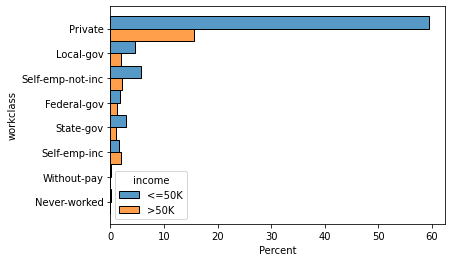

In [149]:
sns.histplot(y="workclass", data=dataFrame, hue="income", multiple="dodge", stat="percent")
plt.show()

Por fim, o gráfico mostra a relação entre setor de atuação econômica e ganhos anuais, em que se nota que o trabalho autônomo empresaial é o único que estatísticamente implica em ganhos anuais maiores, com todos os outros setores sendo dominados por pessoas com uma renda anual inferior a 50 mil dólares.

## Marital Status


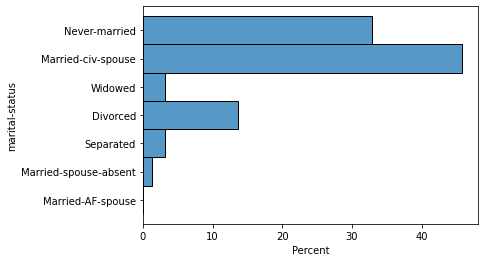

In [150]:
sns.histplot(y="marital-status", data=dataFrame, stat="percent")
plt.show()

O gráfico mostra uma predominância de pessoas casadas e solteiras, agregando mais de 50%, com o terceiro maior grupo, de 15%, sendo de divorciados.

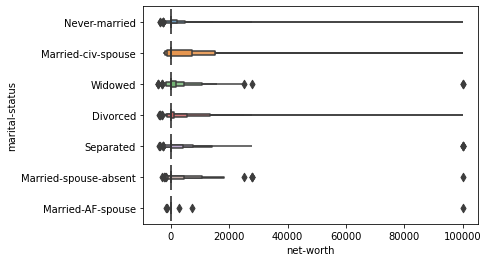

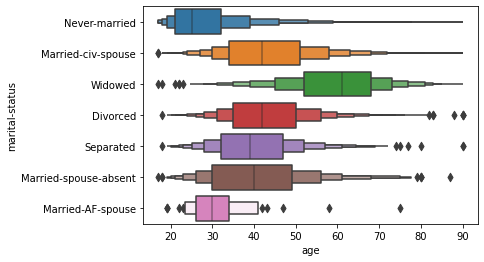

In [161]:
sns.boxenplot(y="marital-status", x="net-worth" ,data=dataFrame) 
plt.show()
sns.boxenplot(y="marital-status", x="age" ,data=dataFrame)
plt.show()

O primeiro gráfico mostra a relação entre estado civil e ganho com investimentos, observando-se uma leve tendencia de pessoas casadas à ganharem mais com investimentos, entretanto nada mais pode ser dito com precisão. <br><br>
Já o segundo gráfico correlaciona idade com estado civil, sendo viúvos um **outlier** pois é composto majoritariamente por pessoas de idades entre 50-70 anos, já o grupo de solteiros também é um **outlier** pois a média etária está na faixa de 20-35 anos. 

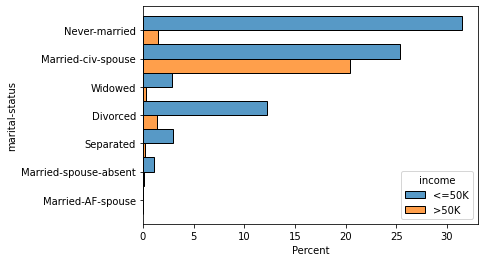

In [151]:
sns.histplot(y="marital-status", data=dataFrame, hue="income", multiple="dodge", stat="percent")
plt.show()

Por último, o gráfico permite concluir que uma união entre duas pessoas pelo casamento está de alguma forma correlacionado com maior renda anual.

## Occupation


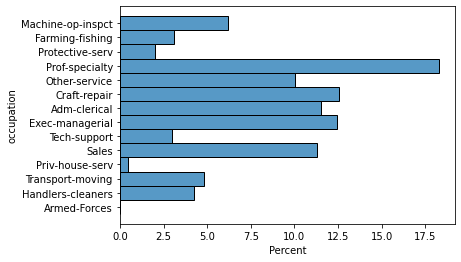

In [162]:
sns.histplot(y="occupation", data=dataFrame, stat="percent")
plt.show()

O gráfico uma distribuição heterogênea entre os empregos, com ocupações como especialistas, reparo, padres, gestores e setor financeiro dominando a distribuição, sendo os serventes e militares privados os grupos com menores participações.

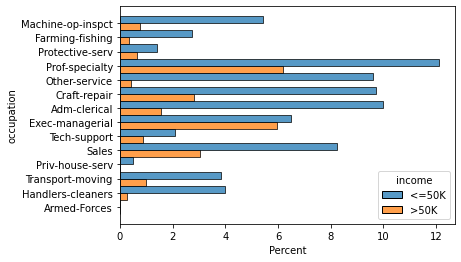

In [163]:
sns.histplot(y="occupation", data=dataFrame, hue="income", multiple="dodge", stat="percent")
plt.show()

O gráfico então mostra a relação entre renda e emprego, com ocupações que requerem alto nível educacional, como especialistas e gestores, ganhando anualmente em média mais do que outras profissões. Já faxineiros, fazendeiros, serventes e outros serviços os grupos que menos ganham e, também, os que requerem menor grau de escolaridade.

## Relationship


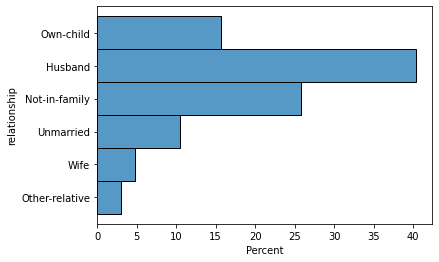

In [165]:
sns.histplot(y="relationship", data=dataFrame, stat="percent")
plt.show()

O gráfico mostra que existe uma concentração dos dados para maridos de fámilia, filhos(as) próprios(as) ou que não pertencem a um núcleo familiar atualmente. Sendo esposas e outros parentes contribuindo significativamente menos do que os citados, com uma participação inferior à 10%.

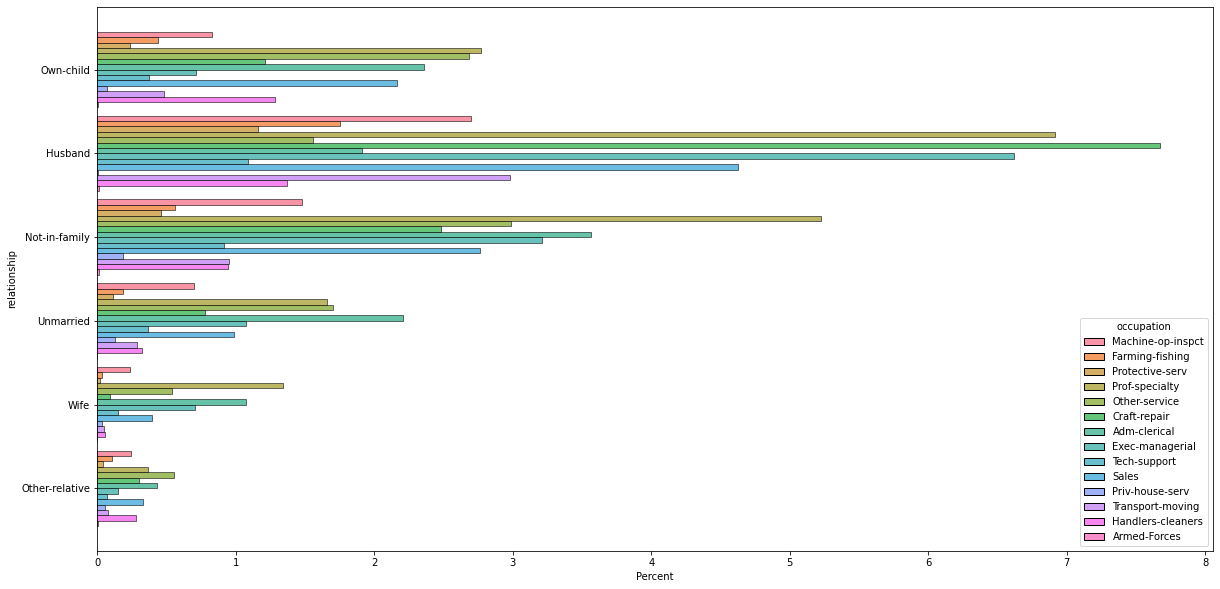

In [202]:
plt.figure(figsize=(20,10))
sns.histplot(y="relationship", data=dataFrame, hue="occupation", multiple="dodge", stat="percent",shrink=0.9)
plt.show()

O gráfico mostra a percentagem da proporção de cada ocupação por situação familiar, em que nota-se alguns empregos destacando-se em situações específicas, como por exemplo maridos compõem os maiores prestadores de manutenção, profissionais especialistas, executivos, seguranças, operadores de máquinas, motoristas e faxineiros. Sendo a ocupação mais proeminente a de especialista, e as menos aparentes, serventes, militares e seguranças.

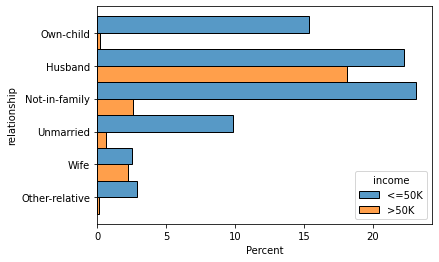

In [203]:
sns.histplot(y="relationship", data=dataFrame, hue="income", multiple="dodge", stat="percent")
plt.show()

Por fim, mostra claramente uma relação entre união estável e renda anual, com aqueles casados, maridos e esposas, ganhando em média mais do que aqueles seprados ou viuvos.

## Race


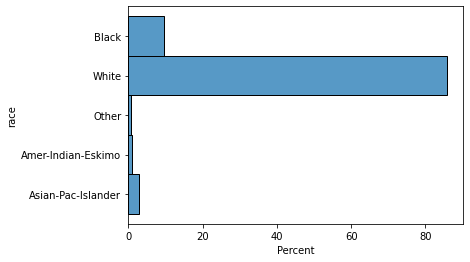

In [204]:
sns.histplot(y="race", data=dataFrame, stat="percent")
plt.show()

Pelo histograma, fica claro o já exposto fenômeno da dominância da etnia branca na população, acima de 80%, sendo a segunda mais predominante a negra com apenas 10%.

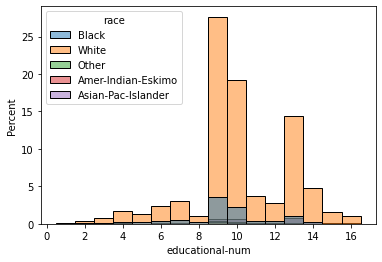

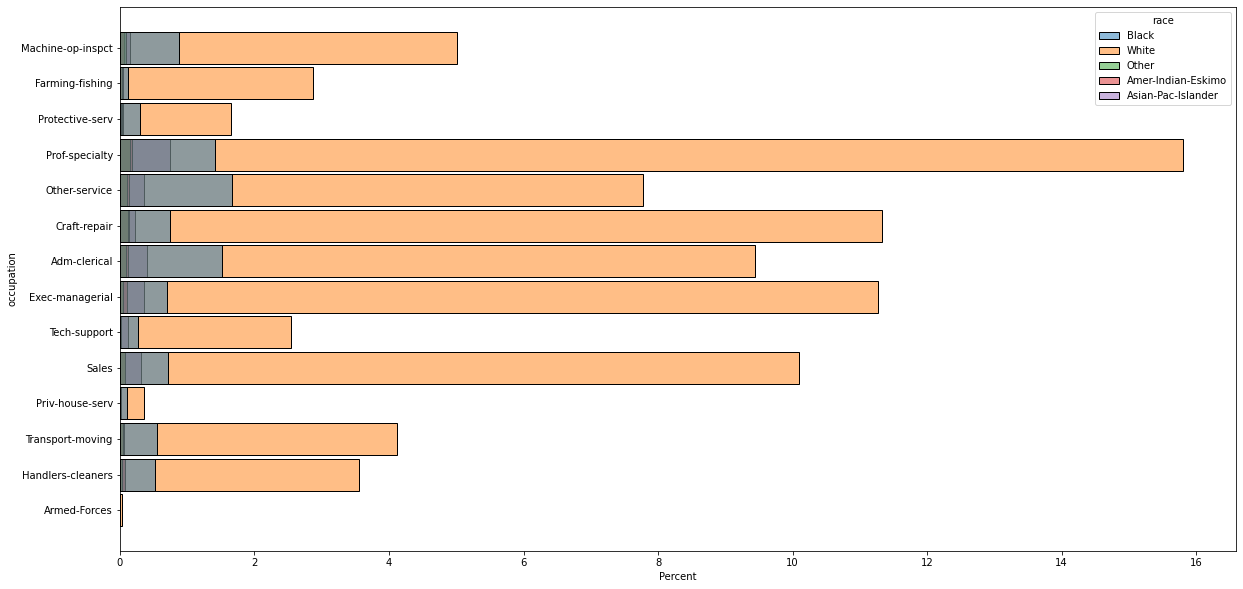

In [209]:
sns.histplot(x="educational-num", data=dataFrame, discrete=True, stat="percent", hue="race")
plt.show()
plt.figure(figsize=(20,10))
sns.histplot(y="occupation", data=dataFrame, hue="race", stat="percent",shrink=0.9)
plt.show()


Aqui vemos dois gráficos, o primeiro apresentando uma distribuição homogênea entre as diferentes etnias sendo coerente com a distribuição apresentada anteriormente <br><br>
O segundo no entanto é menos homogêneo, principalmente no que diz respeito a participação de outras etnias em empregos que estão ligados à uma renda maior, como especialistas, setor de finanças e executivos. Com a maior parte da população negra concentrada no setor administrativo e outros serviços. <br>
Vale ressaltar a dominança no setor fazendeiro da etnia branca, que mesmo associada a uma baixa renda, emprega quase que exclusivamente brancos.

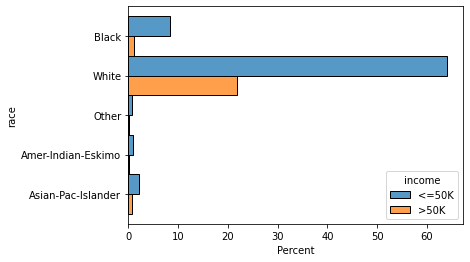

In [212]:
sns.histplot(y="race", data=dataFrame, discrete=True, stat="percent",multiple="dodge", hue="income")
plt.show()

Por fim, vê-se uma concordância com o exposto anteriormente, em razão de negros e outras etnias ocuparem profissões de menor renda, a renda anual média é inferior a da população branca.

## Gender


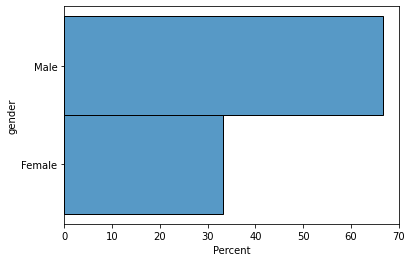

In [213]:
sns.histplot(y="gender", data=dataFrame, discrete=True, stat="percent")
plt.show()

O gráfico mostra que dois terços da população estudada foi composta por pessoas do gênero masculino, apresentando um possível viés aos dados.

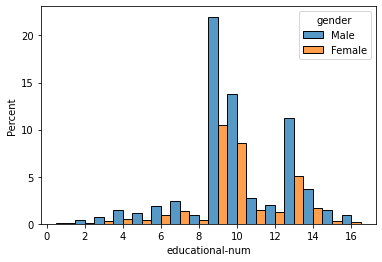

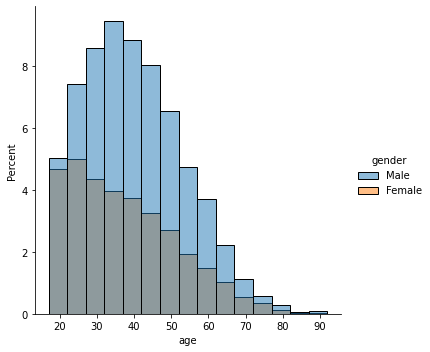

In [224]:
sns.histplot(x="educational-num", data=dataFrame, discrete=True,multiple="dodge", stat="percent", hue="gender")
plt.show()
sns.displot(x="age", data=dataFrame, hue="gender",multiple="layer", stat="percent", binwidth=5)
plt.show()


Os dois primeiros gráficos relacionam gênero com grau de escolaridade e idade e ambos apresentam uma distribuição homogênea entre os dois gêneros, com exceção do gráfico etário em que a curva de distribuição das mulheres está transposta para a esquerda, ou seja, existem proporcionalmente mais mulheres entre 20-30 do que homens.

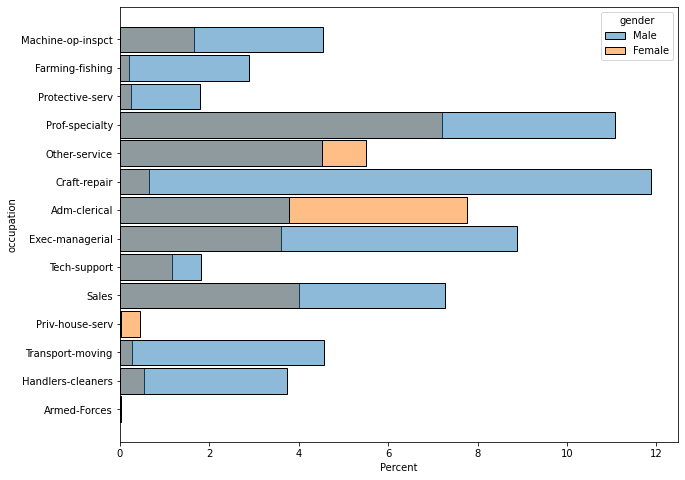

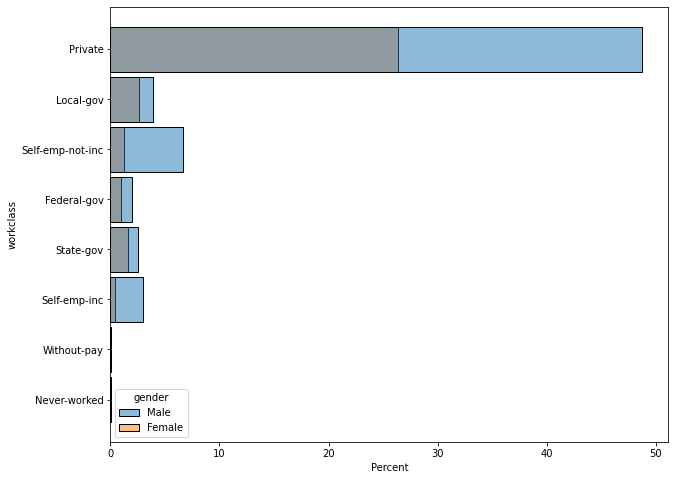

In [227]:
plt.figure(figsize=(10,8))
sns.histplot(y="occupation", data=dataFrame, hue="gender", stat="percent",shrink=0.9)
plt.show()
plt.figure(figsize=(10,8))
sns.histplot(y="workclass", data=dataFrame, hue="gender", stat="percent",shrink=0.9)
plt.show()

Já os dois últimos gráficos abordam gênero do ponto de vista da participação econômica<br><br>
O primeiro fala sobre o gênero relacionado com a área de atuação, notávelmente os homens tem maior presença na maior parte das áreas, especialmente na de manutenção, tranporte,logística, agricultura e segurança pessoal; enquanto a mulher tem maior participação na área de administração, servente particular e outros serviços. Vale ressaltar que as mulheres estão mais presentes em áreas de menor renda porém ainda têm presença em setores de alta rentabilidade, como as áreas especializadas.<br><br>
Já no segundo, o qual aborda a questão de gênero quando comparada a diferentes modos de trabalho, percebe-se alguns **outliers** nos setores de empregos autônomos, tanto empresariais como não, no qual há uma grande dominância dos homens. Além disso, o setor de trabalho autônomo empresarial tem correlação positiva com renda anual, justamente o que a mulher se encontra em menor número.

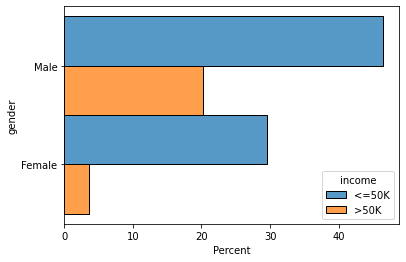

In [220]:
sns.histplot(y="gender", data=dataFrame, discrete=True,stat="percent",hue="income",multiple="dodge")
plt.show()

Por fim, o gráfico expõe um resultado ainda mais díspar do que esperado, mulheres não só têm menor presença nos setores com alta retabilidade, como é seguro dizer que também são tratadas de modo desigual nas áreas que possuem alta retabilidade.

## Native Country

 #### *De dataFrame["native-country"].valuecounts()*
  -  `United-States             `    **91.3452%**
  -  `Mexico                    `    **1.9819%**
  -  `Philippines               `    **0.6148%**
  -  `Germany                   `    **0.4293%**
  -  `Puerto-Rico               `    **0.3835%**
  -  `Canada                    `    **0.3793%**
  -  `El-Salvador               `    **0.3230%**
  -  `India                     `    **0.3147%**
  -  `Cuba                      `    **0.2876%**
  -  `England                   `    **0.2647%**
  -  `China                     `    **0.2542%**
  -  `South                     `    **0.2397%**
  -  `Jamaica                   `    **0.2209%**
  -  `Italy                     `    **0.2188%**
  -  `Dominican-Republic        `    **0.2147%**
  -  `Japan                     `    **0.1917%**
  -  `Guatemala                 `    **0.1834%**
  -  `Poland                    `    **0.1813%**
  -  `Vietnam                   `    **0.1792%**
  -  `Columbia                  `    **0.1771%**
  -  `Haiti                     `    **0.1563%**
  -  `Portugal                  `    **0.1396%**
  -  `Taiwan                    `    **0.1355%**
  -  `Iran                      `    **0.1230%**
  -  `Greece                    `    **0.1021%**
  -  `Nicaragua                 `    **0.1021%**
  -  `Peru                      `    **0.0959%**
  -  `Ecuador                   `    **0.0938%**
  -  `France                    `    **0.0792%**
  -  `Ireland                   `    **0.0771%**
  -  `Hong                      `    **0.0625%**
  -  `Thailand                  `    **0.0625%**
  -  `Cambodia                  `    **0.0584%**
  -  `Trinadad&Tobago           `    **0.0563%**
  -  `Yugoslavia                `    **0.0479%**
  -  `Outlying-US(Guam-USVI-etc)`    **0.0479%**
  -  `Laos                      `    **0.0479%**
  -  `Scotland                  `    **0.0438%**
  -  `Honduras                  `    **0.0417%**
  -  `Hungary                   `    **0.0396%**
  -  `Holand-Netherlands        `    **0.0021%**

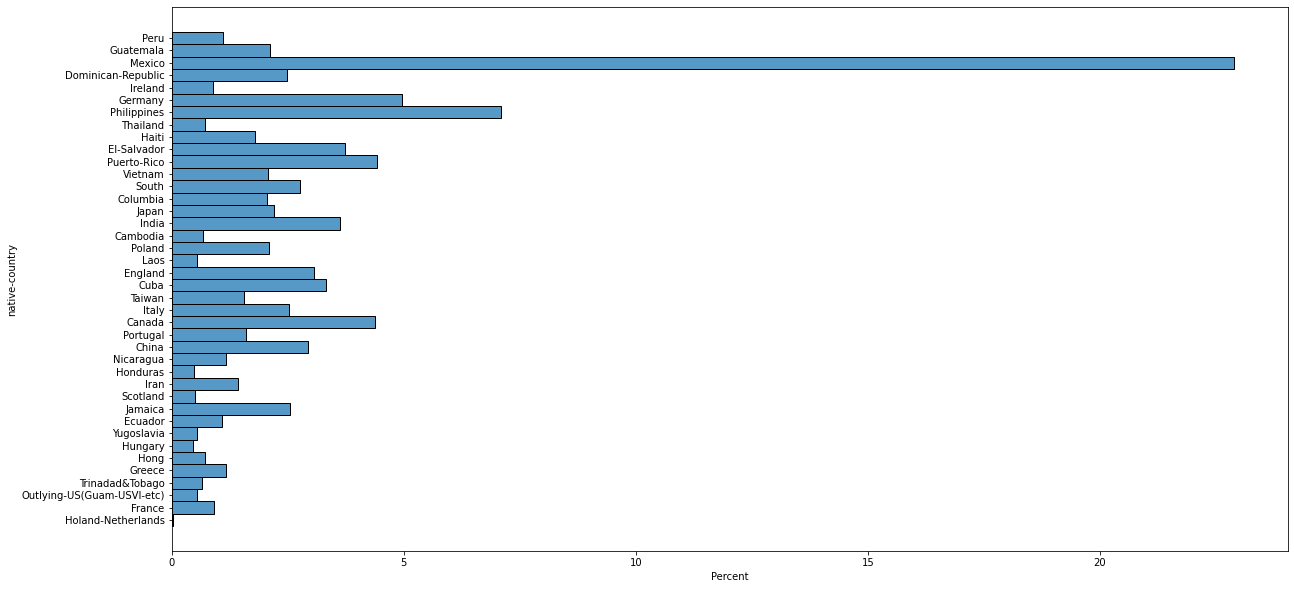

In [244]:
noUS = dataFrame[dataFrame["native-country"]!="United-States"]
plt.figure(figsize=(20,10))
sns.histplot(y="native-country", data=noUS, discrete=True, stat="percent")
plt.show()

Apartir da tabela vemos que a população é composta majoritariamente de estadunidenses e pelo gráfico, que desconsidera os EUA, vemos que a população estrangeira é majoritariamente mexicana.

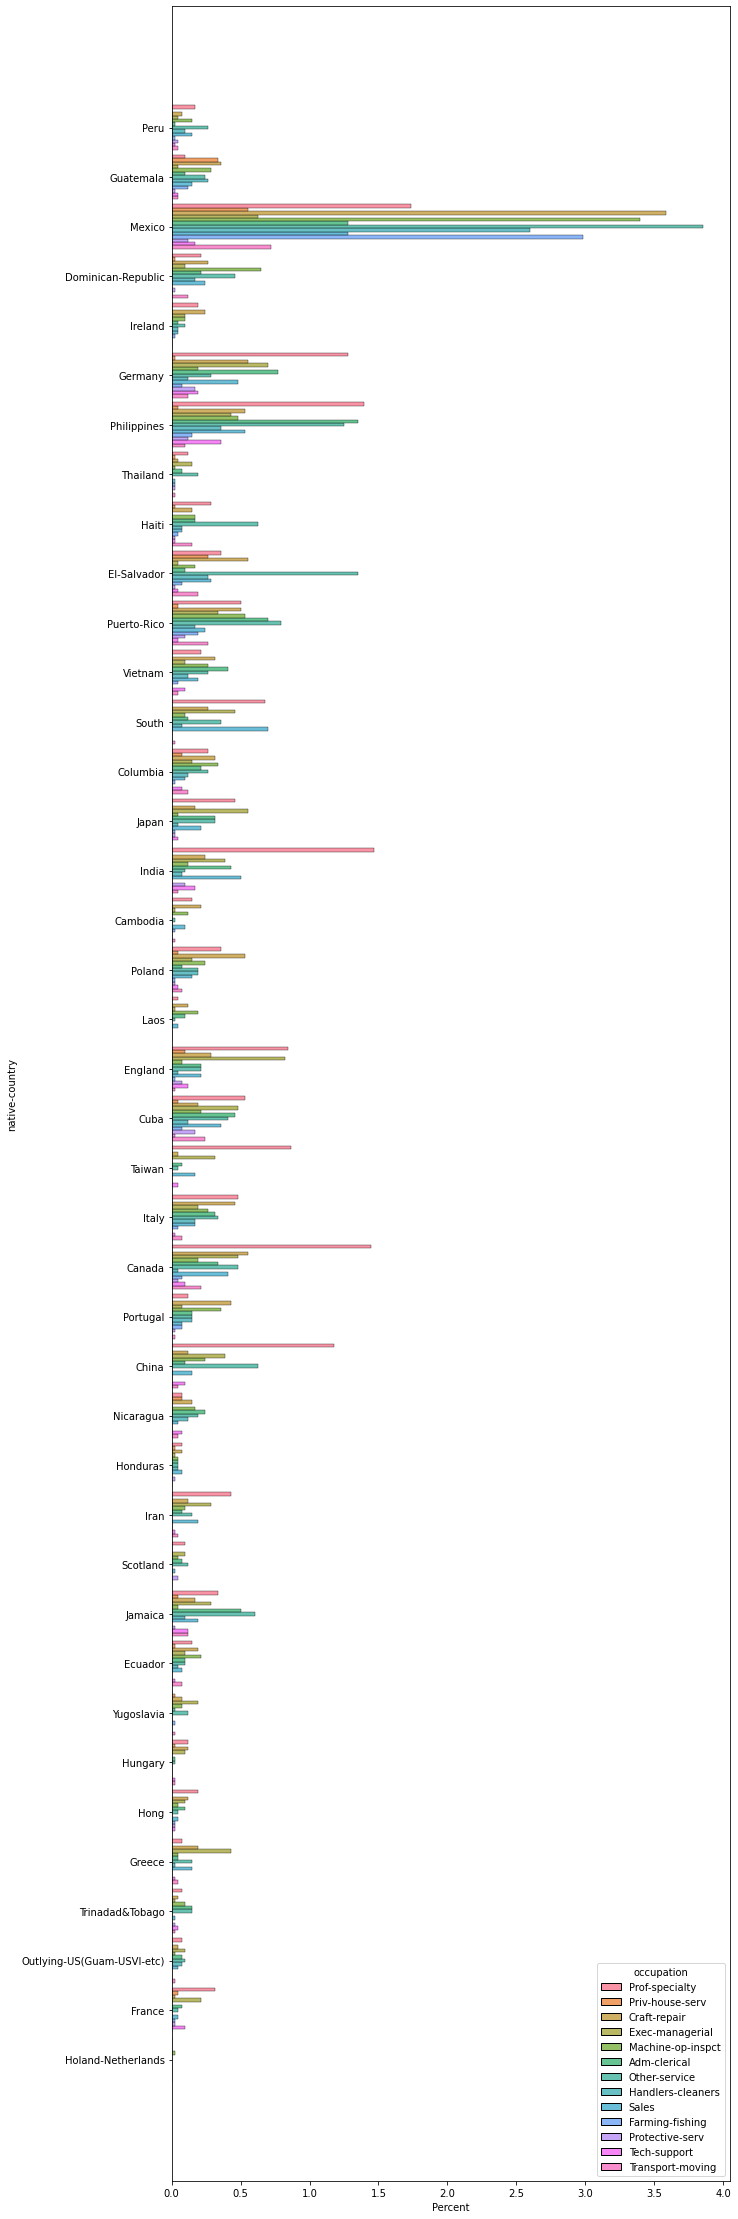

In [252]:
plt.figure(figsize=(10,40))
sns.histplot(y="native-country", data=noUS, hue="occupation", multiple="dodge", stat="percent",shrink=0.9)
plt.show()


Agora, com base no gráfico relacionando país de origem e emprego, percebe-se uma tendência de que pessoas advindas de países subdesenvolvidos, em especial os latinos como o México, tendem a trabalhar em empregos de menor renda do que aqueles advindos de países de primeiro mundo, como a Alemanha ou Canadá, cujas população atua principalmente nos setores especializados e nos executivos.

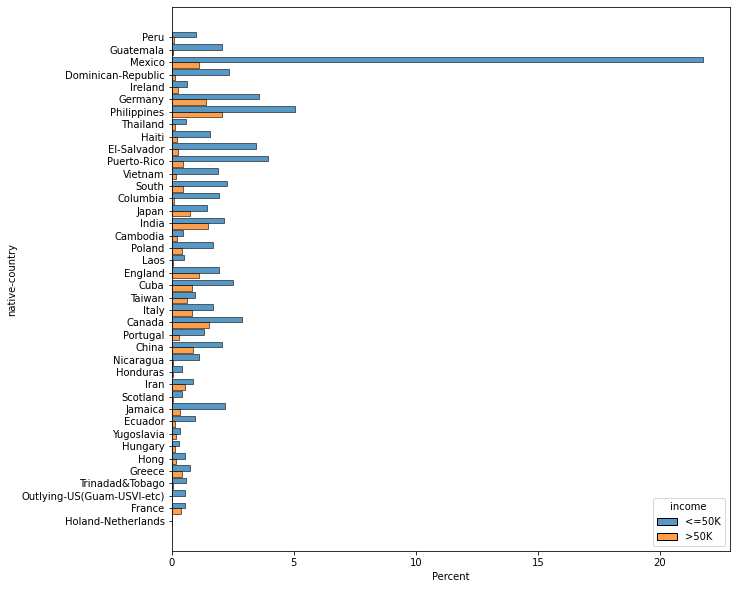

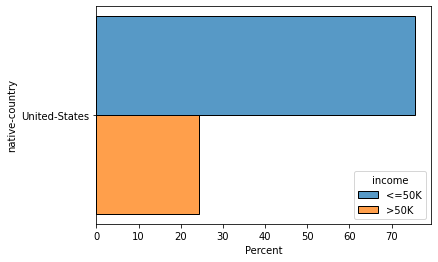

In [256]:
plt.figure(figsize=(10,10))
sns.histplot(y="native-country", data=noUS, hue="income", multiple="dodge", stat="percent",shrink=0.9)
plt.show()
justUS=dataFrame[dataFrame["native-country"]=="United-States"]
sns.histplot(y="native-country", data=justUS, hue="income", multiple="dodge", stat="percent",shrink=0.9)
plt.show()

Então, ao comparar os dados verifica-se uma confirmação da hipótese anterior, a de que originários de países de terceiro mundo têm uma renda anual menor do que aqueles de primeiro mundo e os EUA, porém com algumas exceções: as Philipinas, Cuba e India, todos países emergentes mas que têm uma proporção de renda anual comparável à estadunidense. Também vale destacar que a propórção de ganho anual de algumas nacionalidades é superior à estadunidense, como a canadense, francesa e indiana. <br>
 

# Conclusão

Em primeira análise, os dados apresentados têm um caráter peculiar e descrevem uma população majoritariamente masculina, entre 20 a 50 anos, economicamente ativa, com Ensino Médio completo, expressivamente estadunidense, pouco investidora e com uma situação financeira mista. Dessa forma, é apresentado o perfíl da amostra como possivelmente não sendo representativo dos fatores das relações reais entre as qualidades análisadas com a renda anual dum indivíduo, em razão da amostra ter grupos extremamente heterogêneros, como a "nacionalidade" e gênero. Além disso, esta amostra também abre margem à mais estudos quanto a outras características dessa população com intúito de estudar as possíveis causas dessa discrepância. <br> <br>
Tendo em vista essas ressalvas, a partir dos dados empíricos é possível traçar uma forte relação entre gênero, nacionalidae, etnia, escolaridade, horas de trabalho, estado civil, emprego,  classe de emprego e ganhos com investimentos. Dentre estes dados, "emprego" e "classe de emprego" estão fortemente relacionados com "horas de trabalho" e "eascolaridade", onde emnpregos que exigem maior escolaridade ou maior jornada de trabalho são aqueles que mais estão relacionados a uma alta renda anual.<br>
Quanto à "etnia", "nacionalidade" e "gênero" não é possível realizar uma conclusão acurada em razão destes grupos sofrem do viés supracitado, entretanto, é possível ver que existe uma tendência de acordo com dados apresentados de que pessoas do gênero masculino, estadunidenses e brancas ganharem desproporcionalmente mais do que aquelas pertencentes a outros grupos. <br>
Já "estado civil" apresenta o dado mais surpreendente desta análise, pessoas num relacionamento marital estável também são aquelas com a maior renda anual média dentre os outros grupos, inclusive o grupo "solteiro" superando=o por mais de 15%. Também, quando analisado em conjunto com os dados de "situação familiar" percebe-se novamente uma discrepância de gênero: "maridos" ganham desproporcionalmente mais que "esposas", mesmo quando ambos pertencem ao grupo de "casados" <br>
Agora a relação entre ganhos finais com investimentos e renda anual é coerente com o esperado: aquelas que ganham mais com investimentos também são aquelas com as maiores rendas anuais.<br><br>
Finalmente, o perfil do indívuo mais passível ter uma renda superior à 50 mil dólares anuais é um homem estadunidense branco, executivo, com doutorado, entre 40 à 50 anos, que trabalha mais de 40 horas semanais, investior, casado e que tem uma empresa própria.
